<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/FNNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Feedforward Neural Network

He we implement a simple two-layer feed forward neural network from scratch. This is the most simple type of neural network, as infromation flows in only one direction, from input nodes, through a hidden layer, to output notes. We utilize the sigmoid activation function. An activation function is what takes us from one node to the next in a neural network, i.e., is the function that defines the output given a defined input. The sigmoid activation function is useful for predicting the probability of a given output because its codomain remains between 0 and 1.

[11.89607499 11.92561626]


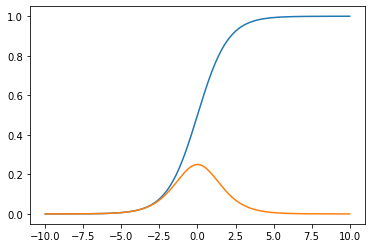

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

#function for the sigmoid activation function
def sigmoid(x):
  y = np.zeros((x.size))
  for i in range(len(x)):
    y[i] = 1 / (1 + np.exp(-x[i]))
  return y

x = np.linspace(-10,10,1000)
y = sigmoid(x)
plt.plot(x,y)

#function for the derivative of sigmoid
def sigmoid_der(x):
  y = np.zeros((x.size))
  for i in range(len(x)):
    y[i] = np.exp(-x[i])/((1+np.exp(-x[i]))**2)
  return y

x2 = np.linspace(-10,10,1000)
y2 = sigmoid_der(x)
plt.plot(x2,y2)

#one input node
#two nodes in the hidden layer
#one output node
#activation function is sigmoid sigma(x)=1/(1+exp(-x))
#derivative of sigmoid is sigma'(x)=exp(-x)/(1+exp(-x)^2)
def two_layer_FNN(inputX, ObsY, stepsize):
  max_ite = 10
  tol = 1e-5
  #initialize
  w0 = np.ones(7)/2
  w = w0
  grad_w = np.zeros(7)
  b1 = np.ones(inputX.shape)
  h1 = np.ones(inputX.shape)
  h1_tilde = h1
  h2 = np.zeros(inputX.shape)
  h2_tilde = h2
  
  ite = 0
  RSS = 1
  
  h1, h1_tilde, h2, h2_tilde, OutY, R = forward_comp(inputX, ObsY, w, b1, b2)

  while ite <= max_ite and RSS > tol:

    #stage 1 is backward computation to update weights usign grad des

    #stage 1 subtask 1 is to compute the gradient for each weights
    grad_w[0] = np.dot(R,h1_tilde)
    grad_w[1] = np.dot(R,h2_tilde)
    grad_w[2] = np.dot(R, b2)
    grad_w[3] = np.dot((R*w[0]), np.multiply(sigmoid_der(h1),inputX))
    grad_w[4] = np.dot((R*w[0]), np.multiply(sigmoid_der(h1),b1))
    grad_w[5] = np.dot((R*w[1]), np.multiply(sigmoid_der(h2),inputX))
    grad_w[6] = np.dot((R*w[1]), np.multiply(sigmoid_der(h2),b1))

    #stage 1 subtask 2 is to update each weight by grad des
    w = w-grad_w*stepsize

    #stage 2 is forward computation to update the RSS
    h1, h1_tilde, h2, h2_tilde, OutY, R = forward_comp(inputX, ObsY, w, b1, b2)
    RSS = 1/2 * np.dot(R,R)

    ite += 1

  return OutY, ite, RSS

def forward_comp(inputX, ObsY, w, b1, b2):
  #compute the output Y under current settings

  OutY = np.zeros(inputX.shape)

  h1 = (inputX * w[3]) + (b1 * w[4])
  h1_tilde = sigmoid(h1)
  
  h2 = (inputX * w[5]) + (b1 * w[6])
  h2_tilde = sigmoid(h2)

  OutY = (h1_tilde * w[0]) + (h2_tilde * w[1]) + (b2 * w[2])

  #compute the initial residual vector R
  R = OutY-ObsY
  return h1, h1_tilde, h2, h2_tilde, OutY, R

input = np.array([1,2])
Obs = input**2


test = two_layer_FNN(input, Obs, 1)
print(test)